<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [5]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-06-13 21:16:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

loan_train.csv      100%[===================>]  22.56K  39.3KB/s    in 0.6s    

2022-06-13 21:16:59 (39.3 KB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File


In [6]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df.shape

(346, 10)

In [8]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object


In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [10]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [11]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       hecd8cb5_0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         132 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi            pkgs/main::certifi-2022.5.18.1-py39he~ --> anaconda::certifi-2021.10.8-py39hecd8cb5_2
  openssl              pkgs/main::openssl-1.1.1o-hca72f7f_0 --> anaconda::openssl-1.1.1n-hca72f7f_0



ca-certificates-2022 | 132 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


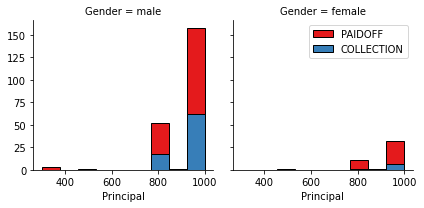

In [12]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

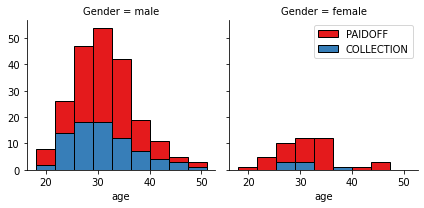

In [13]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


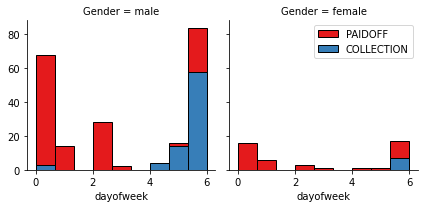

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [20]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [21]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [22]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [23]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [111]:
#Import library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from statistics import mean
from sklearn.metrics import f1_score 
from sklearn.metrics import jaccard_score 


In [102]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [104]:
#calculate the accuracy of KNN for different values of k 
Ks = 10 
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71153846, 0.625     , 0.72115385, 0.72115385, 0.73076923,
       0.71153846, 0.72115385, 0.72115385, 0.75      ])

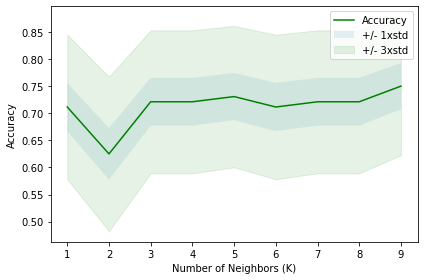

In [31]:
#plot the model accuracy for a different number of neighbors 

plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [105]:
#Extract the best accuracy from the plot
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.75 with k= 9


In [106]:
#let's start the algorithm with k=9 for now:
k = 9
#train model and predict 
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [107]:
#predicting 
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [110]:
#Accuracy evaluation 

print("when k = 9")
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat))

print("Train set Accuracy(F1):", f1_score(y_train,neigh.predict(X_train), average='weighted'))
print("Test set Accuracy(F1):", f1_score(y_test, yhat, average='weighted'))



when k = 9
Train set Accuracy: 0.7933884297520661
Test set Accuracy: 0.75
Train set Accuracy(F1): 0.7710452308843049
Test set Accuracy(F1): 0.7292128603104213


# Decision Tree


In [113]:
#Import library
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics


In [114]:
#finding the best max_depth 

for d in range(1,10):
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = d).fit(X_train, y_train)
    predTree = loanTree.predict(X_test)
    print(d, metrics.accuracy_score(y_test, predTree))

1 0.7403846153846154
2 0.7403846153846154
3 0.7403846153846154
4 0.7403846153846154
5 0.7403846153846154
6 0.7403846153846154
7 0.75
8 0.7115384615384616
9 0.7019230769230769


In [115]:
print("when k = 7")
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7).fit(X_train, y_train)

print("Train set Accuracy(Jaccard):", metrics.accuracy_score(y_train, loanTree.predict(X_train)))
print("Test set Accuracy (Jaccard):", metrics.accuracy_score(y_test, loanTree.predict(X_test)))

print("Train set Accuracy(F1):", f1_score(y_train,loanTree.predict(X_train), average='weighted'))
print("Test set Accuracy(F1):", f1_score(y_test,loanTree.predict(X_test), average='weighted'))


when k = 7
Train set Accuracy(Jaccard): 0.7975206611570248
Test set Accuracy (Jaccard): 0.75
Train set Accuracy(F1): 0.7605703373054301
Test set Accuracy(F1): 0.6908384043272482


In [116]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

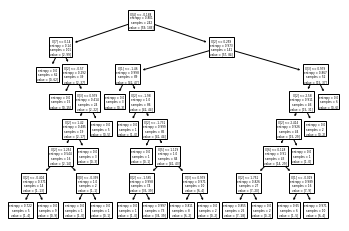

In [117]:
tree.plot_tree(loanTree)
plt.show()

# Support Vector Machine


In [84]:
from sklearn import svm

In [85]:
#k in different kernel 
for k in ('linear','poly','rbf','sigmoid'):
    svm_clf = svm.SVC(kernel=k).fit(X_train, y_train)
    svm_yhat = svm_clf.predict(X_test)
    print("For kernel:{}, the f1 score is: {}".format(k,f1_score(y_test, svm_yhat, average='weighted')))

For kernel:linear, the f1 score is: 0.6299405014874628
For kernel:poly, the f1 score is: 0.6668539325842696
For kernel:rbf, the f1 score is: 0.651984126984127
For kernel:sigmoid, the f1 score is: 0.615600691443388


In [86]:
SVM_clf = svm.SVC(kernel='poly')
SVM_clf.fit(X_train, y_train)

SVC(kernel='poly')

In [87]:
SVMyhat = SVM_clf.predict(X_test)
SVMyhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [89]:
print("Train set Accuracy(Jaccard):", metrics.accuracy_score(y_train, SVM_clf.predict(X_train)))
print("Test set Accuracy (Jaccard):", metrics.accuracy_score(y_test, SVM_clf.predict(X_test)))

print("Train set Accuracy(F1):", f1_score(y_train,SVM_clf.predict(X_train), average='weighted'))
print("Test set Accuracy(F1):", f1_score(y_test,SVM_clf.predict(X_test), average='weighted'))


Train set Accuracy(Jaccard): 0.7892561983471075
Test set Accuracy (Jaccard): 0.75
Train set Accuracy(F1): 0.735837986449289
Test set Accuracy(F1): 0.6668539325842696


# Logistic Regression


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [94]:
for k in ('lbfgs', 'saga','liblinear','newton-cg','sag'):
    lr_model = LogisticRegression(C=0.01, solver=k).fit(X_train, y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print("When Solver is{}, logloss is:{}".format(k, log_loss(y_test, y_prob)))

When Solver islbfgs, logloss is:0.5225896323637266
When Solver issaga, logloss is:0.5225879734266411
When Solver isliblinear, logloss is:0.5762236891512358
When Solver isnewton-cg, logloss is:0.5225889746839594
When Solver issag, logloss is:0.5225865715437867


In [95]:
k = 'liblinear'
LR = LogisticRegression(C=0.01,solver=k).fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [96]:
LRyhat = LR.predict(X_test)
LRyhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [97]:
LRyhat_prob = LR.predict_proba(X_test)
LRyhat_prob[0:5]

array([[0.48692218, 0.51307782],
       [0.45441448, 0.54558552],
       [0.31610496, 0.68389504],
       [0.3603691 , 0.6396309 ],
       [0.3380827 , 0.6619173 ]])

In [98]:
print("Train set Accuracy(Jaccard):", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy (Jaccard):", metrics.accuracy_score(y_test, LR.predict(X_test)))

print("Train set Accuracy(F1):", f1_score(y_train,LR.predict(X_train), average='weighted'))
print("Test set Accuracy(F1):", f1_score(y_test,LR.predict(X_test), average='weighted'))


Train set Accuracy(Jaccard): 0.7644628099173554
Test set Accuracy (Jaccard): 0.7211538461538461
Train set Accuracy(F1): 0.7047601025021466
Test set Accuracy(F1): 0.649160839160839


# Model Evaluation using Test set


In [50]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [51]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-06-13 21:40:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-06-13 21:40:14 (116 MB/s) - 'loan_test.csv' saved [3642/3642]



### Load Test set for evaluation


In [52]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [56]:
#convert date time 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

#extract dayofweek from effective date 
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

#evaluate weekend field 
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#Change Gener variable into 1 or 0 
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#create test_feature 
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]

#get dummies on education 
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)

#drop Master or Above column 
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

# normalize the test data 
X_loan_test = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
X_loan_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [61]:
#assign y_test 
y_loan_test = test_df['loan_status'].values 
y_loan_test

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION'], dtype=object)

In [99]:
#KNN 
#when k = 7
knn_yhat = neigh.predict(X_loan_test)
jc1 = jaccard_score(y_loan_test, knn_yhat, average=None)
fs1 = f1_score(y_loan_test, knn_yhat, average='weighted')

#Decision Tree 
# when k = 7
dt_yhat = loanTree.predict(X_loan_test)
jc2 = jaccard_score(y_loan_test, dt_yhat, average=None)
fs2 = f1_score(y_loan_test, dt_yhat, average='weighted')

#svm 
#kernel='poly'
svm_yhat = SVM_clf.predict(X_loan_test)
jc3 = jaccard_score(y_loan_test, svm_yhat, average=None)
fs3 = f1_score(y_loan_test, svm_yhat, average='weighted')

#Logistic Regression 
#solver='liblinear'
lr_yhat = LR.predict(X_loan_test)
jc4 = jaccard_score(y_loan_test, lr_yhat, average=None)
fs4 = f1_score(y_loan_test, lr_yhat, average='weighted')

#logistic regression predict proba model 
lryhat_prob = LR.predict_proba(X_loan_test)
log4 = log_loss(y_loan_test, lryhat_prob)

list_jc = [jc1[1], jc2[1], jc3[1], jc4[1]]
list_fs = [fs1, fs2, fs3, fs4]
list_log = ['NA', 'NA','NA', log4]



In [100]:
#Report Format 
report = pd.DataFrame(list_jc, index=['KNN', 'Decision Tree','SVM','Logistic Regression'])
report.columns = ['Jaccard']
report.insert(loc=1, column='F1-score', value=list_fs)
report.insert(loc=2, column='LogLoss', value=list_log)
report.columns.name = 'Algorithm'

report 

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.660377,0.615152,NA
Decision Tree,0.711538,0.670478,NA
SVM,0.750000,0.695923,NA
Logistic Regression,0.735849,0.660427,0.576485


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
